In [ ]:
# Load required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

#from sklearn.preprocessing import StandardScaler

data = pd.read_csv('powerconsumption.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)


: 

In [ ]:
data.isnull().sum()


In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data)
plt.title('Outliers Detection')
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler , StandardScaler, MinMaxScaler
RS = RobustScaler()
data["PowerConsumption_Total"] = data['PowerConsumption_Zone1'] + data["PowerConsumption_Zone2"] + data["PowerConsumption_Zone3"]
x = data.drop(['PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3'],axis=1)
y = data['PowerConsumption_Total']

In [ ]:
scaled_x = RS.fit_transform(x)
x= pd.DataFrame(scaled_x, columns=x.columns)

In [3]:

data['Year'] = data.index.year

data['Month'] = data.index.month

data['Day'] = data.index.day

data['Hour'] = data.index.hour

data['Minute'] = data.index.minute

data['Weeknumber'] = data.index.isocalendar().week

data["PowerConsumption_Total"] = data['PowerConsumption_Zone1'] + data["PowerConsumption_Zone2"] + data["PowerConsumption_Zone3"]
data.loc[(data["Month"] == 1) & (data["Weeknumber"] == 52), "Weeknumber"] = 1

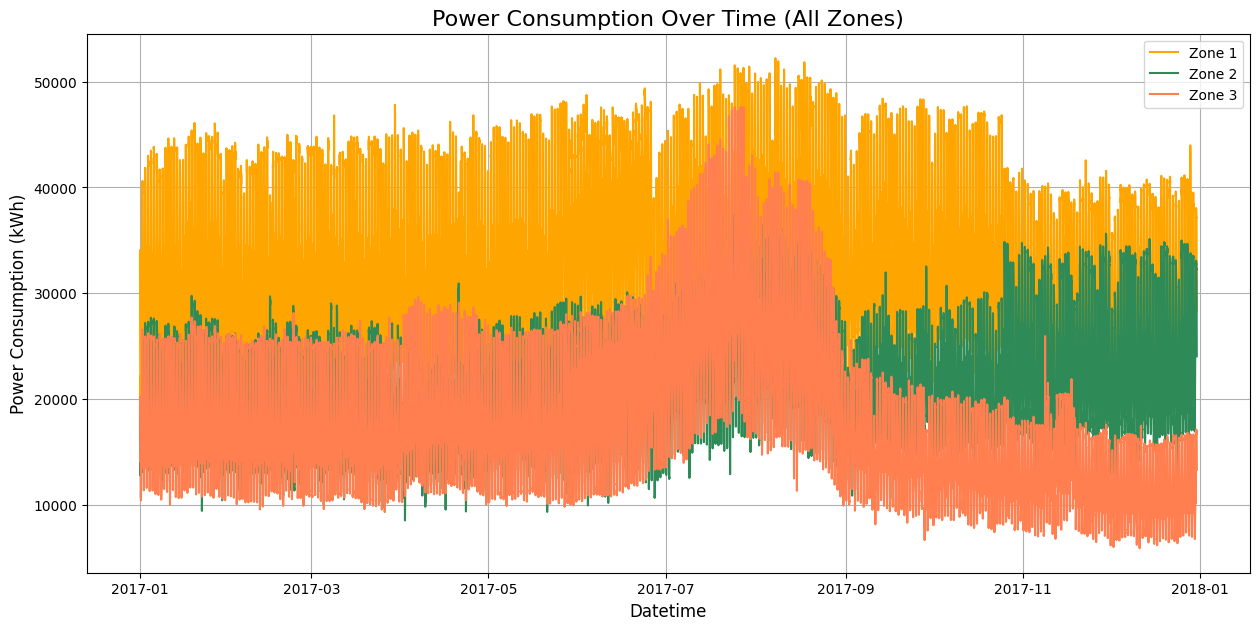

In [4]:

# Plot time-series data for power consumption in each zone
plt.figure(figsize=(15, 7))
plt.plot(data['PowerConsumption_Zone1'], label='Zone 1',color='orange')
plt.plot(data['PowerConsumption_Zone2'], label='Zone 2',color='seagreen')
plt.plot(data['PowerConsumption_Zone3'], label='Zone 3',color='coral')
plt.title('Power Consumption Over Time (All Zones)', fontsize=16)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('Power Consumption (kWh)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


<Axes: xlabel='Datetime'>

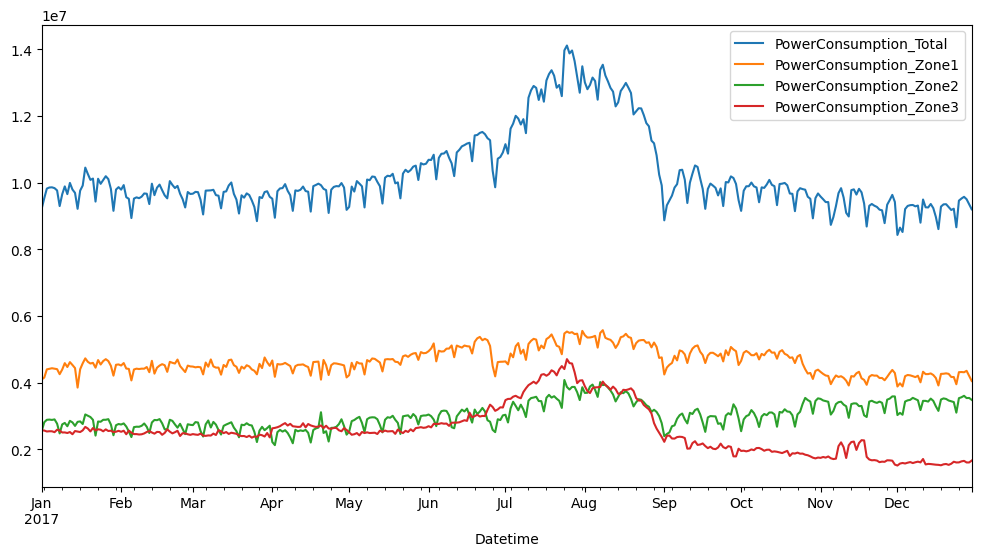

In [5]:
df_daily = data[["PowerConsumption_Total", "PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]].resample("1d").sum()

fig, ax = plt.subplots(figsize=(12,6))

df_daily.plot(ax=ax)

<Axes: xlabel='Month', ylabel='PowerConsumption_Total'>

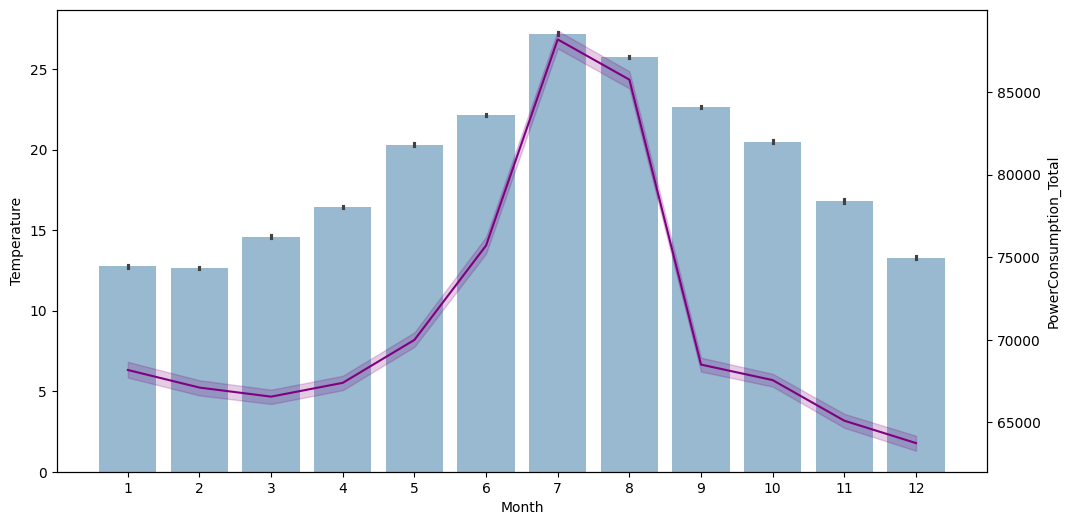

In [6]:
outros = data[['Temperature', 'Humidity', 'WindSpeed']].resample("1d").median()

df_daily = pd.concat([df_daily, outros], axis="columns")
fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(data=data, x="Month", y="Temperature", ax=ax1, alpha=0.5)
ax2 = ax1.twinx()
sns.lineplot(data=data, x=data["Month"]-1, y="PowerConsumption_Total", ax=ax2, color="purple")

/var/folders/1w/mjz9s8w14fs4n7jwq4r5rb0m0000gn/T/ipykernel_5029/3032027733.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="Weeknumber", y="Humidity", ax=ax1, alpha=0.5,palette="Spectral")


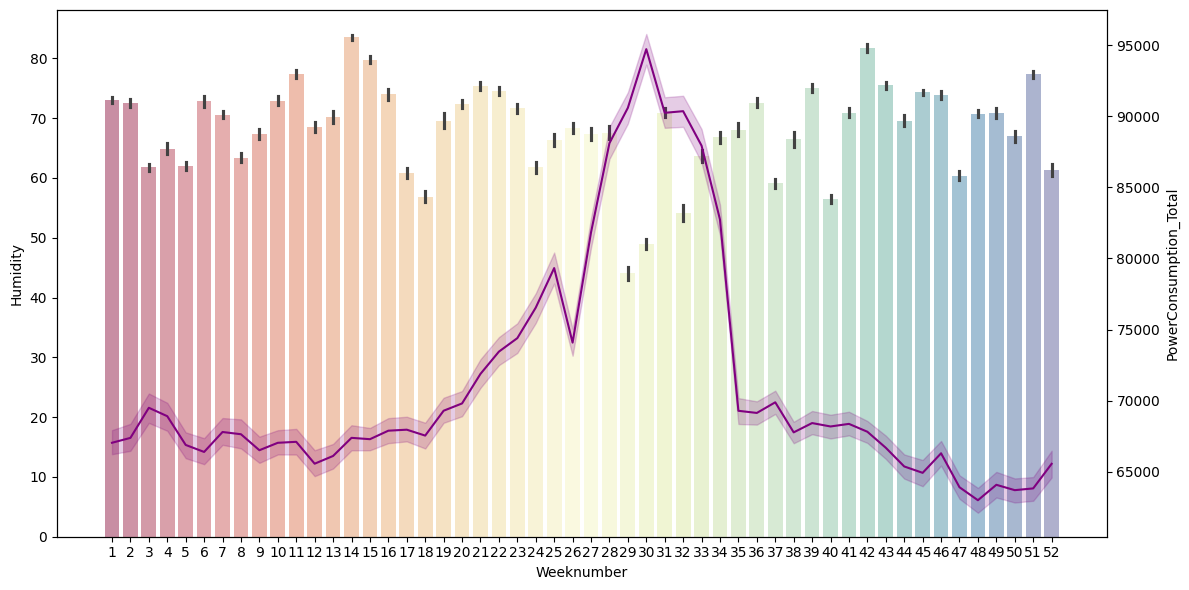

In [7]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(data=data, x="Weeknumber", y="Humidity", ax=ax1, alpha=0.5,palette="Spectral")

ax2 = ax1.twinx()
sns.lineplot(data=data, x=data["Weeknumber"]-1, y="PowerConsumption_Total", ax=ax2, color="purple")

plt.tight_layout()


/var/folders/1w/mjz9s8w14fs4n7jwq4r5rb0m0000gn/T/ipykernel_5029/3256530980.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Hour", y="PowerConsumption_Total",palette="pastel")


Text(0.5, 1.0, 'Power consumption per hour')

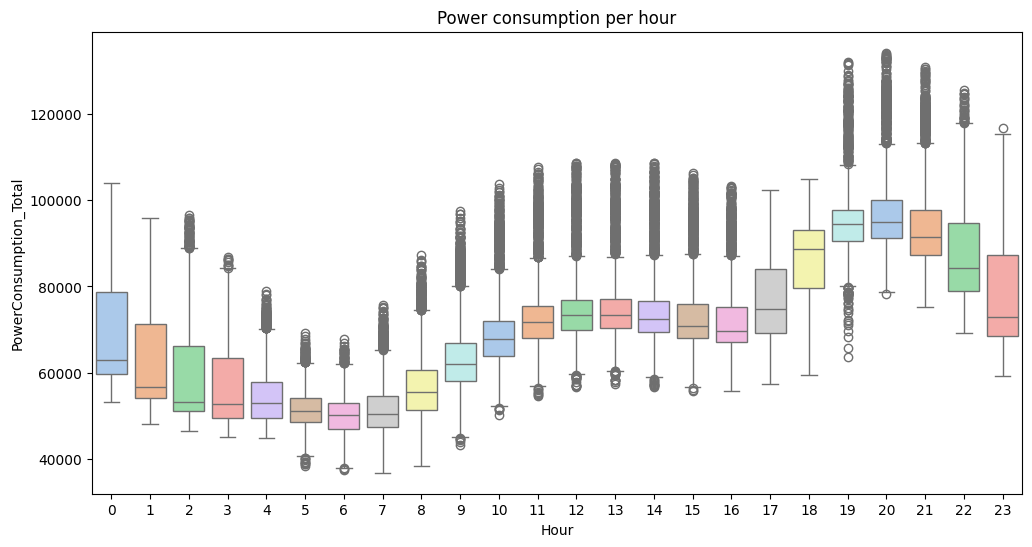

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=data, x="Hour", y="PowerConsumption_Total",palette="pastel")

plt.title("Power consumption per hour")

In [9]:
from sklearn.preprocessing import StandardScaler
x= data.drop(['PowerConsumption_Total','Year','Month','Day','Minute','Weeknumber'],axis=1)
y=data['PowerConsumption_Total']

Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x) 
x_scaled

array([[-2.10664461,  0.35627749, -0.7989004 , ..., -0.94467227,
         0.36326195, -1.66132477],
       [-2.13157832,  0.40129059, -0.7989004 , ..., -0.3205729 ,
         0.3466691 , -1.66132477],
       [-2.14894594,  0.40129059, -0.80017763, ..., -0.39139766,
         0.27680448, -1.66132477],
       ...,
       [-2.0480074 ,  0.29197306, -0.79762318, ...,  0.81423659,
        -0.60840556,  1.66132477],
       [-2.07242524,  0.30483395, -0.80017763, ...,  0.70167962,
        -0.65278385,  1.66132477],
       [-2.10303352,  0.37556882, -0.79975189, ...,  0.57921197,
        -0.67801856,  1.66132477]])

In [10]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(y_train)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -206.27106021010775
p-value: 0.0


In [12]:
import pmdarima as pm


In [13]:
auto_model = pm.auto_arima(y_train, seasonal=False, trace=True,
                            error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=17.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=966047.059, Time=0.52 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=953697.058, Time=0.86 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=8.95 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=966045.059, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=948675.273, Time=1.67 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=946117.481, Time=2.38 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=944354.633, Time=3.56 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=943176.331, Time=6.25 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=72.21 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=44.24 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=943174.331, Time=2.43 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=944352.633, Time=1.57 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=15.43 sec
 ARIMA(4,1,1)(0,0,0)[0]             

In [14]:
auto_model.fit(y_train)
arima_pred = auto_model.predict(n_periods=len(y_test))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [15]:
mse = mean_squared_error(y_test, arima_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 294986577.5112234


In [16]:
auto_model = pm.auto_arima(y_train,seasonal=True, m=24,trace=True, error_action='ignore',suppress_warnings=True)
auto_model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=159.83 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=966047.059, Time=0.51 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=953699.014, Time=14.75 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=inf, Time=119.64 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=966045.059, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=953697.058, Time=0.91 sec
 ARIMA(1,1,0)(0,0,1)[24] intercept   : AIC=953699.014, Time=14.89 sec
 ARIMA(1,1,0)(1,0,1)[24] intercept   : AIC=953701.014, Time=17.45 sec
 ARIMA(2,1,0)(0,0,0)[24] intercept   : AIC=948675.273, Time=2.38 sec
 ARIMA(2,1,0)(1,0,0)[24] intercept   : AIC=948676.051, Time=19.04 sec
 ARIMA(2,1,0)(0,0,1)[24] intercept   : AIC=948676.054, Time=17.94 sec
 ARIMA(2,1,0)(1,0,1)[24] intercept   : AIC=948678.051, Time=22.18 sec
 ARIMA(3,1,0)(0,0,0)[24] intercept   : AIC=946117.481, Time=2.75 sec
 ARIMA(3,1,0)(1,0,0)[24] intercept   : AIC=946119.187, Time=21.6

: 

In [1]:
sarimax_pred = auto_model.predict(n_periods=len(y_test))
mse = mean_squared_error(y_test, sarimax_pred)
print(f'Mean Squared Error (SARIMAX): {mse}')

NameError: name 'auto_model' is not defined